In [33]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb

# import tqdm
# import tqdm.auto
# tqdm.tqdm = tqdm.auto.tqdm

# print(tf.__version__)

tf.compat.v1.enable_eager_execution()

In [34]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
class_names = ['Ниггативный', 'Позитивный']

In [35]:
# train_data[0]
# train_labels[0]
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [36]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [37]:
x_val = x_train[:12500]
partial_x_train = x_train[12500:]
y_val = y_train[:12500]
partial_y_train = y_train[12500:]

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                partial_y_train,
                epochs=4,
                batch_size=512,
                validation_data=(x_val, y_val))

Epoch 1/4
25/25 [==============================] - 3s 73ms/step - loss: 0.5287 - accuracy: 0.7537 - val_loss: 0.3790 - val_accuracy: 0.8690
Epoch 2/4
25/25 [==============================] - 1s 46ms/step - loss: 0.3117 - accuracy: 0.8902 - val_loss: 0.3270 - val_accuracy: 0.8723
Epoch 3/4
25/25 [==============================] - 1s 36ms/step - loss: 0.2312 - accuracy: 0.9182 - val_loss: 0.2872 - val_accuracy: 0.8850
Epoch 4/4
25/25 [==============================] - 1s 28ms/step - loss: 0.1872 - accuracy: 0.9347 - val_loss: 0.2860 - val_accuracy: 0.8867


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


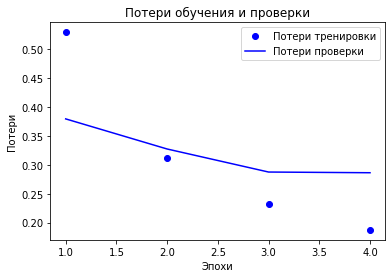

In [39]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,  4 + 1)

plt.plot(epochs, loss_values, 'bo', label='Потери тренировки')
plt.plot(epochs, val_loss_values, 'b', label='Потери проверки')
plt.title('Потери обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

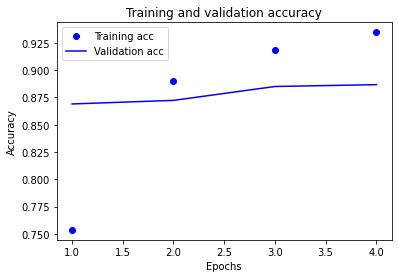

In [40]:
plt.clf() 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2952 - accuracy: 0.8796


In [42]:
predictions = model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


In [43]:
print(predictions)
categorical_predictions = predictions.copy()
for i, num in enumerate(predictions):
  categorical_predictions[i] = 0 if num < 0.5 else 1
print(categorical_predictions)
print(test_labels)


[[0.26583958]
 [0.99751306]
 [0.9575466 ]
 ...
 [0.0684921 ]
 [0.1246039 ]
 [0.60781413]]
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]
[0 1 1 ... 0 0 0]


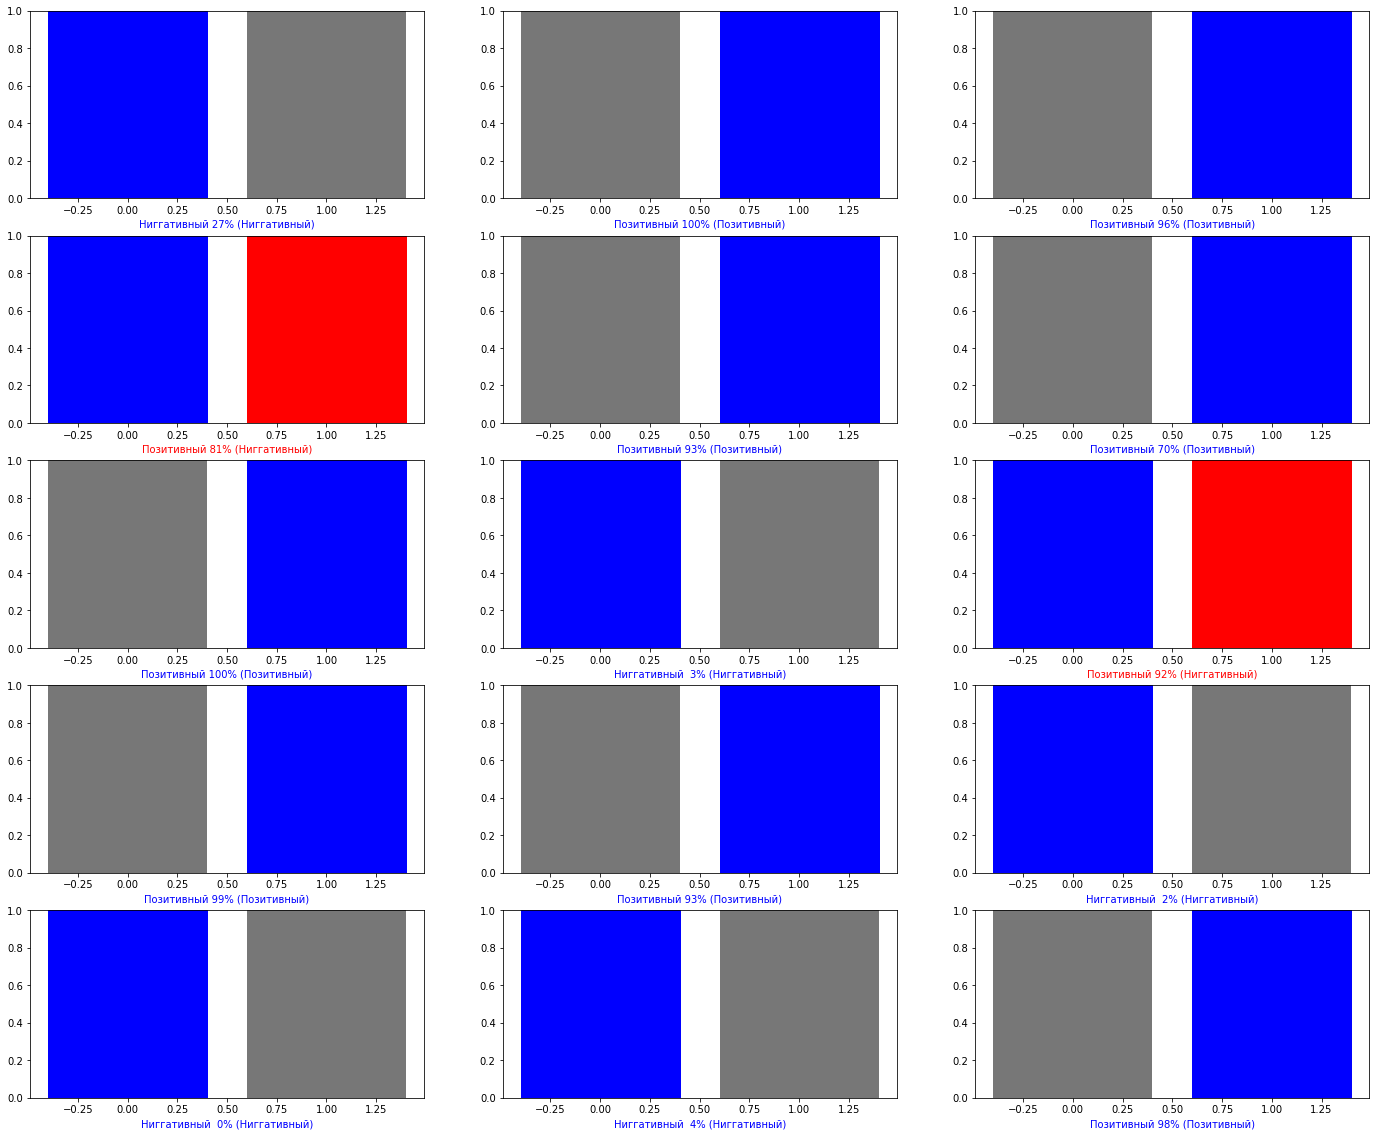

In [54]:
def plot_value_array(i, predictions_array, true_label):

    plt.grid(False)
    thisplot = plt.bar(range(2), 1, color="#777777")
    plt.ylim([0, 1])
    predicted_label = int(predictions_array[i])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[i]].set_color('blue')
    if predicted_label == true_label[i]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * float(predictions[i]),
                                        class_names[true_label[i]]),
                                        color=color)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(8*num_cols, 4*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_value_array(i, categorical_predictions, test_labels)